# ICC Men's Cricket Tournaments Classification

This notebook performs classification on the ICC Men's Cricket Tournaments dataset.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("ICC Men Cricket Tournaments.csv")

# Display the first few rows
df.head()


,Sl No.,Year,ICC Event,Host(s),Final venue,Winners,Result,Scoreccard,Runner-up,Winning Captain,Total Teams
0,1,1975,World Cup,England,"Lord's, London",West Indies,West Indies won by 17 runs,WI: 291/8 (60 overs)\nAUS: 274 all out (58.4 o...,Australia,Clive Lloyd,8
1,2,1979,World Cup,England,"Lord's, London",West Indies,West Indies won by 92 runs,WI: 286/9 (60 overs)\nENG: 194 all out (51 overs),England,Clive Lloyd,8
2,3,1983,World Cup,England & Wales,"Lord's, London",India,India won by 43 runs,IND: 183 all out (54.4 overs)\nWI: 140 all out...,West Indies,Kapil Dev,8
3,4,1987,World Cup,India & Pakistan,"Eden Gardens, Kolkata",Australia,Australia won by 7 runs,AUS: 253/5 (50 overs)\nENG: 246/8 (50 overs),England,Allan Border,8
4,5,1992,World Cup,Australia & New Zealand,"Melbourne Cricket Ground, Melbourne",Pakistan,Pakistan won by 22 runs,PAK: 249/6 (50 overs)\nENG: 227 all out (49.2 ...,England,Imran Khan,9


In [2]:

# Display dataset information
df.info()

# Check for missing values
df.isnull().sum()

# Unique values in categorical columns
df.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sl No.           30 non-null     int64 
 1   Year             30 non-null     int64 
 2   ICC Event        30 non-null     object
 3   Host(s)          30 non-null     object
 4   Final venue      30 non-null     object
 5   Winners          30 non-null     object
 6   Result           30 non-null     object
 7   Scoreccard       30 non-null     object
 8   Runner-up        29 non-null     object
 9   Winning Captain  30 non-null     object
 10  Total Teams      30 non-null     int64 
dtypes: int64(3), object(8)
memory usage: 2.7+ KB


Sl No.             30
Year               28
ICC Event           3
Host(s)            20
Final venue        23
Winners             8
Result             27
Scoreccard         30
Runner-up           8
Winning Captain    23
Total Teams         8
dtype: int64

In [3]:

# Encode categorical features using Label Encoding
label_encoders = {}
categorical_columns = ['ICC Event', 'Host(s)', 'Final venue', 'Winners', 'Runner-up', 'Winning Captain']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Select features and target variable
X = df[['Year', 'Total Teams', 'Host(s)', 'Final venue', 'Runner-up', 'Winning Captain']]
y = df['Winners']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((24, 6), (6, 6), (24,), (6,))

In [15]:

# Train a RandomForest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         1

    accuracy                           0.67         6
   macro avg       0.50      0.56      0.49         6
weighted avg       0.67      0.67      0.62         6



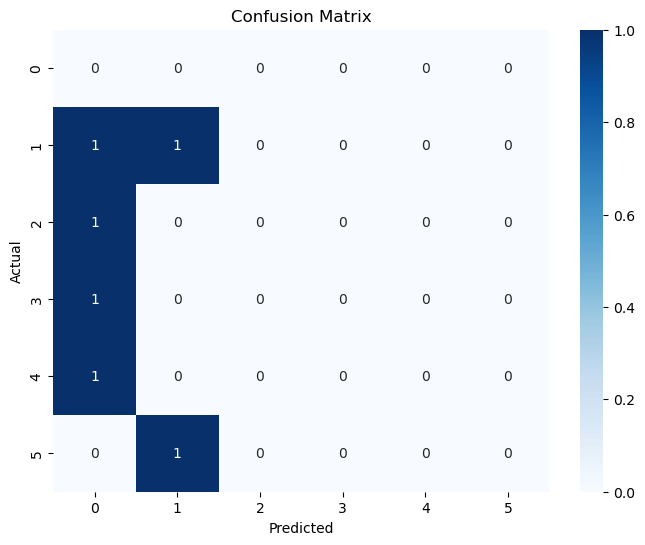

In [17]:
# Define your true and predicted labels
y_true = [1, 0, 1, 1, 0, 2]  # True labels (example)
y_pred = [1, 0, 1, 0, 0, 0]  # Predicted labels (example)

# Generate classification report with zero_division set to handle undefined metrics
print("Classification Report:")
print(classification_report(y_true, y_pred, zero_division=0))


# Display confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
